# <center>MỘT VÀI ĐỊNH NGHĨA</center>
**PMF** = probability mass function, dành cho discrete distributions  
**PDF** = probability density function, dành cho continuous distributions  
=> Hai định nghĩa trên được hiểu là xác suất xảy ra event với các params như p,n,.. tại giá trị x.  

**CDF** = cumulative density function, là tổng xác suất từ giá trị đầu tiên đến giá trị x  
**SF** = survival function, là tổng xác suất từ giá trị x đến giá trị cuối cùng, = 1-CDF  
=> Đối với discrete distributions thì 2 functions này tổng các PMF.  
=> Đối với continuous distributions thì 2 functions này là tích phân PDF

*Ngược lại,*  
**PPF** = percent point function, nhập CDF cho giá trị x  
**ISF** = inverse survival function, nhập SF cho giá trị x

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

---
# <center>DISCRETE DISTRIBUTIONS</center>

---
# [BERNOULLI DISTRIBUTION](https://en.wikipedia.org/wiki/Bernoulli_distribution)
Là phân phối của tỉ lệ ra event  
$$ X \sim B(p) $$
$$ \text{PMF} = 
\begin{cases}
1-p \;& \text{with x=0} \\
p   \;& \text{with x=1}
\end{cases}$$
$$ E[X] = p \quad \text{Var}(X)= p(1-p)$$

In [2]:
# 1 đồng xu có p(head)=0.4
p = 0.4
bernoulli = st.bernoulli(p)

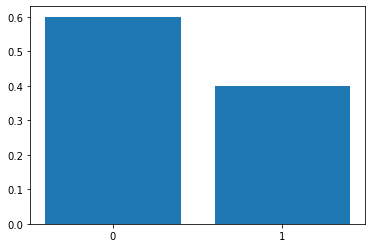

In [3]:
# vẽ pmf
a = [0,1]
plt.bar(a, bernoulli.pmf(a))
plt.xticks(a);

---
# [BINOMIAL DISTRIBUTION](https://en.wikipedia.org/wiki/Binomial_distribution)
Là phân phối tổng của nhiều lần bernoulli.  
$$ X \sim Binom(n, p) $$
$$ \text{PMF} = C^n_xp^x(1-p)^{n-x} $$
$$ C^n_x = Combination = \frac{n!}{x!(n-x)!} $$
$$ E[X] = np \quad \text{Var}(X) = np(1-p) $$

In [4]:
# Tung 1 đồng xu có p(head)=0.4 và tung 100 lần
n, p = 100, 0.4
binom = st.binom(n,p)

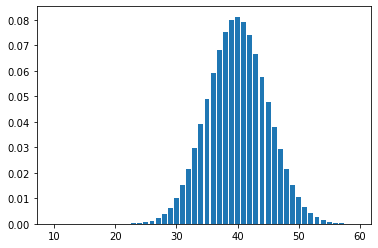

In [5]:
# vẽ pmf từ 10 đến 60
a = np.arange(10,60)
plt.bar(a, binom.pmf(a));

In [6]:
# xác suất để tung 20 lần ra head khi tung 100 lần
binom.pmf(20)

1.0530552862387031e-05

In [7]:
# xác suất để tung 40 lần ra head khi tung 100 lần
binom.pmf(40)

0.08121914499609979

In [8]:
# xác suất để tung 35 đến 45 lần ra head khi tung 100 lần
np.sum(binom.pmf(np.arange(35,46)))

0.7385730184692305

In [9]:
binom.mean()

40.0

---
# [GEOMETRIC DISTRIBUTION](https://en.wikipedia.org/wiki/Geometric_distribution)
Là phân phối của số lần để đạt được event đầu tiên.  
Ví dụ:  
- Số lần để ra mặt head đầu tiên của một đồng xu
- Số lần test để có donor đầu tiên tương hợp ghép tạng 

$$ X \sim \text{Geo}(p) $$
$$ \text{PMF} = p(1-p)^{x-1} \quad\text{for x=1, 2,..} $$
$$ E[X] = 1/p \quad \text{Var}(X) = \frac{1-p}{p^2}$$

In [10]:
# 1 đồng xu fake có p(head) = 0.3
p=0.3
geom = st.geom(p)

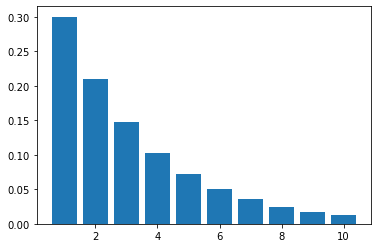

In [11]:
# vẽ pmf
a = np.array(range(1,11))
plt.bar(a, geom.pmf(a));

**=> Như vậy, xác suất để lần 1 ra head là 0.3, lần 2 ra head là 0.7\*0.3=0.21, lần 3 là 0.7\*0.7\*0.3=0.15, từ từ giảm xuống**

In [12]:
# xác xuất để 3 lần đầu ra head
# dùng CDF(3) = PMF(1) + PMF(2) + PMF(3)
geom.cdf(3)

0.657

In [13]:
# dùng tổng PMF
a = np.array([1,2,3])
np.sum(geom.pmf(a))

0.657

---
# [MULTINOMIAL DISTRIBUTION](https://en.wikipedia.org/wiki/Multinomial_distribution)
là phân phối tổng quát hóa của binomial distribution.  
- n là tổng số lần
- k là số nhóm
- $x_i$ là số lần của nhóm i => $\sum_{i=1}^kx_i=n $
- $p_i$ là xác suất nhóm i => $\sum_{i=1}^kp_i=1 $
$$ X_1, X_2,\dots, X_k \sim Multinomial(n, k, p_1, \dots, p_k) $$
$$ \text{PMF} = \frac{n!}{x_1!\dots x_2!}p_1^{x_1}p_2^{x_2}\dots p_k^{x_k}$$
$$ E[X_i] = np_i \quad \text{Var}(X_i) = np_i(1-p_i) $$

In [14]:
# 1 cục xí ngầu có p1=..=p5=0.15; p6 =0.25
# tung 100 lần
n = 100
p1 = p2 = p3 = p4 = p5 = 0.15
p6 = 0.25
multi = st.multinomial(n, [p1,p2,p3,p4,p5,p6])

In [15]:
# xác xuất để ra k1=k2=k3=k4=k5=10, k6=50
multi.pmf([10,10,10,10,10,50])

2.4528839654987966e-11

In [16]:
# xác xuất để ra k1=k2=k3=k4=k5=14, k6=30
multi.pmf([14,14,14,14,14,30])

1.284961789878166e-05

In [17]:
# xác xuất để ra k1=k2=k3=k4=k5=15, k6=25
multi.pmf([15]*5 + [25])

2.25011423021118e-05

---
# [POISSON DISTRIBUTION](https://en.wikipedia.org/wiki/Poisson_distribution)
Là phân phối số lần xảy ra event khi biết khoảng thời gian/không gian giữa 2 events xảy ra là hằng định.  
$$ X \sim \text{Poisson}(\lambda) $$
$$ \text{PMF} = \frac{\lambda^xe^{-\lambda}}{x!} $$
$$ E[X] = \text{Var}(X) = \lambda $$

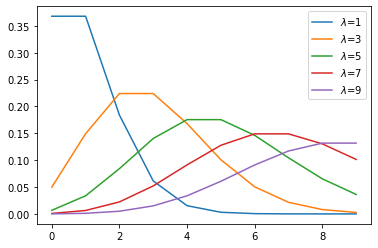

In [40]:
a = np.arange(0,10)
for i in np.array([1,3,5,7,9]):
    plt.plot(a, st.poisson(i).pmf(a), label=f"$\lambda$={i}");
plt.legend();

In [18]:
# Xuất huyết não 2 ca / tuần
poisson = st.poisson(2)

In [44]:
# Xác suất xảy ra nhiều hơn 2 ca Xuất huyết não tuần sau
# = 1 - xác suất ( 0 ca + 1 ca + 2 ca)
1 - poisson.cdf(2)

0.3233235838169366

---
# <center>CONTINUOUS DISTRIBUTIONS</center>

---
To be continued